**Hipotesis 3**

“Existe una alta concentración del valor del mercado del café en un número reducido de países.”

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df_cafe= pd.read_csv("./src/Coffee_domestic_consumption.csv")

In [ ]:
# 2. Definir las variables a mantener (id_vars) y las variables a derretir (value_vars)
id_vars = ['Country', 'Coffee type']

# Identificamos las columnas de valor (los años) excluyendo las id_vars y la columna Total
# Usamos .filter() para seleccionar solo las columnas con el formato 'XXXX/YY'
year_columns = [col for col in df_cafe.columns if '/' in col and col != 'Total_domestic_consumption']

# 3. Aplicar la función melt (Pivoteo)
df_long = pd.melt(
    df_cafe,
    id_vars=id_vars,
    value_vars=year_columns,
    var_name='Year_Period',  # El periodo fiscal (ej. '1990/91')
    value_name='Domestic_Consumption' # El valor del consumo
)

# 4. Limpieza y Normalización de la Columna Temporal
# Extraemos solo el año de inicio (ej. '1990' de '1990/91')
df_long['Year'] = df_long['Year_Period'].str.split('/').str[0].astype(int)

# Eliminamos la columna Year_Period ya que Year es más útil para el merge
df_long = df_long.drop(columns=['Year_Period'])

print("--- DataFrame en Formato Largo (Primeras filas) ---")
df_long.head()



--- DataFrame en Formato Largo (Primeras filas) ---


,Country,Coffee type,Domestic_Consumption,Year
0,Angola,Robusta/Arabica,1200000,1990
1,Bolivia (Plurinational State of),Arabica,1500000,1990
2,Brazil,Arabica/Robusta,492000000,1990
3,Burundi,Arabica/Robusta,120000,1990
4,Ecuador,Arabica/Robusta,21000000,1990


In [ ]:
consumo_pais = (
    df_long
    .groupby("Country")["Domestic_Consumption"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

consumo_pais.head()


,Country,Domestic_Consumption
0,Brazil,27824700000
1,Indonesia,4920480000
2,Ethiopia,4536540000
3,Mexico,3189660000
4,Philippines,2807280000


**Distribución del consumo**

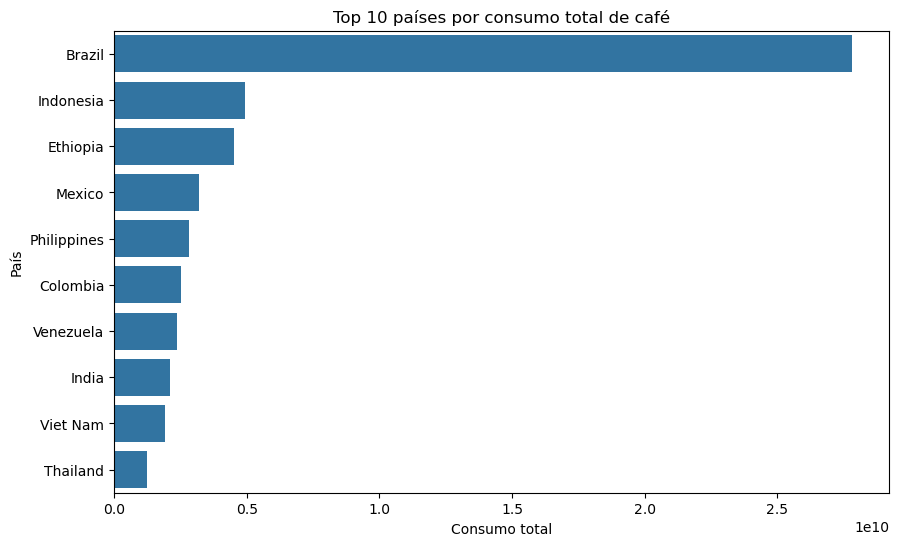

In [ ]:
# Top 10 Paises

plt.figure(figsize=(10,6))
sns.barplot(
    data=consumo_pais.head(10),
    x="Domestic_Consumption",
    y="Country"
)
plt.title("Top 10 países por consumo total de café")
plt.xlabel("Consumo total")
plt.ylabel("País")
plt.show()


**Curva de concentración (Pareto)**

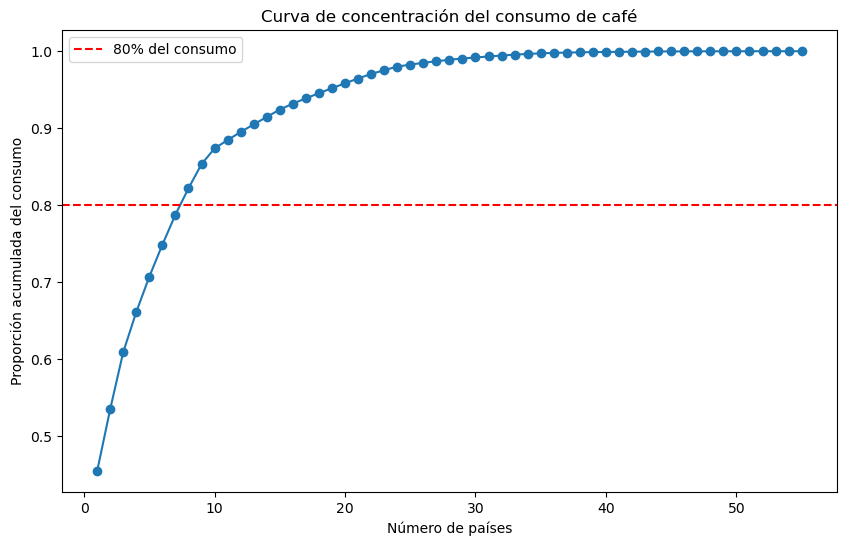

In [ ]:
consumo_pais["Share"] = consumo_pais["Domestic_Consumption"] / consumo_pais["Domestic_Consumption"].sum()
consumo_pais["Cumulative_share"] = consumo_pais["Share"].cumsum()
consumo_pais["Rank"] = range(1, len(consumo_pais) + 1)

plt.figure(figsize=(10,6))
plt.plot(consumo_pais["Rank"], consumo_pais["Cumulative_share"], marker="o")
plt.axhline(0.8, color="red", linestyle="--", label="80% del consumo")
plt.title("Curva de concentración del consumo de café")
plt.xlabel("Número de países")
plt.ylabel("Proporción acumulada del consumo")
plt.legend()
plt.show()


Medida directa: cuanto concentran los países Top? 

In [ ]:
def porcentaje_top(n):
    return consumo_pais.head(n)["Share"].sum() * 100

for n in [3, 5, 10]:
    print(f"Top {n} países concentran el {porcentaje_top(n):.2f}% del consumo total")


Top 3 países concentran el 60.93% del consumo total
Top 5 países concentran el 70.73% del consumo total
Top 10 países concentran el 87.38% del consumo total


In [ ]:
def gini(array):
    array = np.sort(array)
    n = len(array)
    index = np.arange(1, n + 1)
    return (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))

gini_consumo = gini(consumo_pais["Domestic_Consumption"].values)
print(f"Coeficiente de Gini del consumo: {gini_consumo:.3f}")


Coeficiente de Gini del consumo: 0.840


Cuanto porcentaje concentra el pais mas importante del mundo relacionado con el cafe?


In [ ]:
#Identificar pais mas consumidor del mundo

top1_pais = consumo_pais.iloc[0]["Country"]
top1_consumo = consumo_pais.iloc[0]["Domestic_Consumption"]

total_consumo = consumo_pais["Domestic_Consumption"].sum()

porcentaje_top1 = (top1_consumo / total_consumo) * 100

print(top1_pais, porcentaje_top1)


Brazil 45.47503034873754


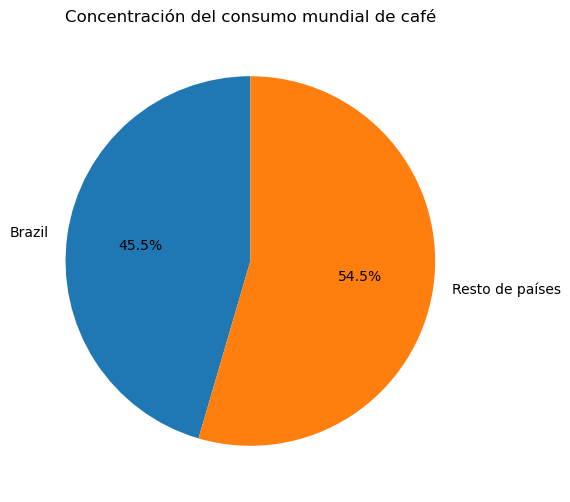

In [ ]:
top_vs_rest = pd.DataFrame({
    "Grupo": [top1_pais, "Resto de países"],
    "Consumo": [top1_consumo, total_consumo - top1_consumo]
})

plt.figure(figsize=(6,6))
plt.pie(
    top_vs_rest["Consumo"],
    labels=top_vs_rest["Grupo"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Concentración del consumo mundial de café")
plt.show()
